In [22]:
import numpy as np
import pandas as pd
import xlrd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import sklearn.metrics as sm

In [50]:
original_data = pd.read_csv('E:\oneDrive\桌面\先进数据分析\city_road_data.csv')
original_data = original_data.values
resource_data = pd.read_csv('E:\oneDrive\桌面\先进数据分析\city_road_data.csv')
np_data = resource_data.iloc[:, :].values
# print(original_data)
# print(np_data == original_data)
# Z-score normalization
scaler = preprocessing.StandardScaler()
scaler.fit(original_data)
array_data = scaler.transform(np_data)
train_data = array_data[:, 1:-1]


In [57]:
# train cluster
# Enter the number of cluster
k = 7
model = KMeans(n_clusters=k)
model.fit(train_data)
label = np.zeros((len(model.labels_), 1), dtype=int)
for i in range(len(model.labels_)):
    label[i, 0] = int(model.labels_[i])
combine = np.concatenate((array_data, label), axis=1)
writer = pd.ExcelWriter('E:\oneDrive\桌面\data_analysis\cluster_result_xsl\\result_cluster_%d.xls'%k)
r0 = pd.concat([pd.DataFrame(array_data[:, 0:5]), pd.DataFrame(model.labels_)], axis=1)
r0.columns = ['Index','length_sum','length_mean','travel_time','count','label']
r0.to_excel(writer, sheet_name='cluster_label')
for i in range(len(np.unique(model.labels_))):
    cluster_subset = combine[combine[:, -1] == i][:, :-1]
    r0 = pd.DataFrame(np.arange(0, int(len(cluster_subset[:, 0])), 1).T)
    r1 = pd.DataFrame(cluster_subset)
    r = pd.concat([r0, r1], axis=1)
    r.columns = ['Index'] + list(resource_data.columns)
    r.to_excel(writer, sheet_name='cluster'+str(i))

C:\Users\wyl\AppData\Local\Temp\ipykernel_1288\2214586178.py:10: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  writer = pd.ExcelWriter('E:\oneDrive\桌面\data_analysis\cluster_result_xsl\\result_cluster_%d.xls'%k)


D:\workspace\anaconda\envs\py38\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\workspace\anaconda\envs\py38\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


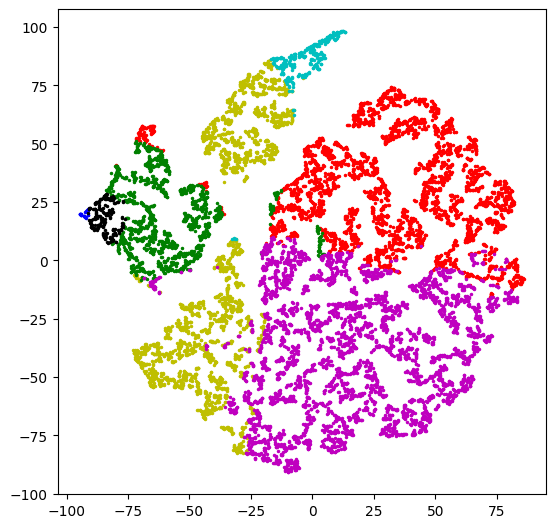

In [58]:
# draw the png
tsne = TSNE()
r = model.labels_
tsne.fit_transform(train_data)  # dimension reduction
tsne = pd.DataFrame(tsne.embedding_)  # dataframe change
fig_width = 16 / 2.54  # width 16cm
fig_height = 16 / 2.54  # height 8cm
dpi = 300  # set the dpi of the png
markersize=3
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(fig_width, fig_height)
)
d = tsne[r == 0]
plt.plot(d[0], d[1], 'r.',markersize=markersize)

d = tsne[r == 1]
plt.plot(d[0], d[1], 'y.',markersize=markersize)

d = tsne[r == 2]
plt.plot(d[0], d[1], 'b.',markersize=markersize)
d = tsne[r == 3]
plt.plot(d[0], d[1], 'g.',markersize=markersize)

d = tsne[r == 4]
plt.plot(d[0], d[1], 'm.',markersize=markersize)
d = tsne[r == 5]
plt.plot(d[0], d[1], 'c.',markersize=markersize)

d = tsne[r == 6]
plt.plot(d[0], d[1], 'k.',markersize=markersize)

plt.show()
# saving path of the cluster result png
fig.savefig(r'E:\oneDrive\桌面\data_analysis\cluster_result_png\k=%d.png'%k, dpi=dpi)  # 指定分辨率保存
writer.save()

In [46]:
# estimate the 
x = train_data
print("The silhouette score of the %d cluster is"%k,sm.silhouette_score(x, label,sample_size=len(x), metric='euclidean'))
print("The calinski score of the %d cluster is"%k,sm.calinski_harabasz_score(x, label))

D:\workspace\anaconda\envs\py38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The silhouette score of the 7 cluster is 0.3463862767811805
The calinski score of the 7 cluster is 7072.255028898753


D:\workspace\anaconda\envs\py38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
